In [21]:
import matplotlib.pyplot as plt
import os
import cv2

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
# Ruta de la carpeta con imágenes
folder_path = "./images"

['albert-gleizes_femme-cubiste-1921.jpg']


In [37]:

# Leer la única imagen en la carpeta
archivo = os.listdir(folder_path)[0]  # Tomar el primer archivo
img_path = os.path.join(folder_path, archivo)

# Cargar y procesar la imagen
img = cv2.imread(img_path)
img = cv2.resize(img, (500, 500))  # Redimensionar
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

# Convertir a matriz de píxeles (N, 3)
datos_pixeles = img.reshape(-1, 3)



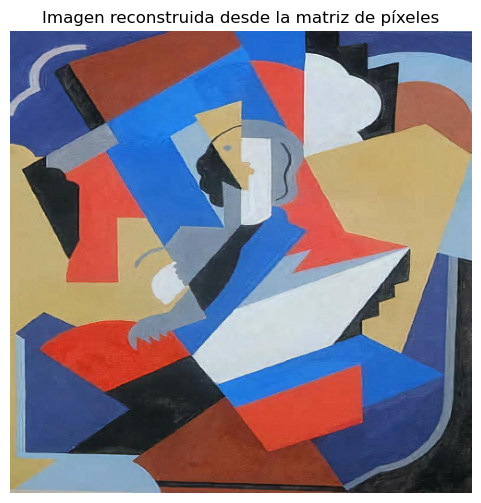

In [35]:
# Mostrar la imagen original reconstruida desde `datos_pixeles`
imagen_recuperada = datos_pixeles.reshape((500, 500, 3))  # Volver a la forma original

plt.figure(figsize=(6, 6))
plt.imshow(imagen_recuperada)
plt.axis("off")
plt.title("Imagen reconstruida desde la matriz de píxeles")
plt.show()

Forma de la matriz de píxeles: (1000000, 3)


In [39]:
# Normalizar los valores RGB al rango [0, 1]
datos_pixeles = datos_pixeles / 255.0

print(f"Forma de la matriz de píxeles: {datos_pixeles.shape}")  # Debería ser (N, 3)
print(f"Ejemplo de valores normalizados: {datos_pixeles[:5]}")  # Muestra 5 píxeles normalizados

Forma de la matriz de píxeles: (250000, 3)
Ejemplo de valores normalizados: [[0.20784314 0.28235294 0.54117647]
 [0.20784314 0.28235294 0.54117647]
 [0.20784314 0.28235294 0.54117647]
 [0.20784314 0.28235294 0.54117647]
 [0.20784314 0.28235294 0.54117647]]


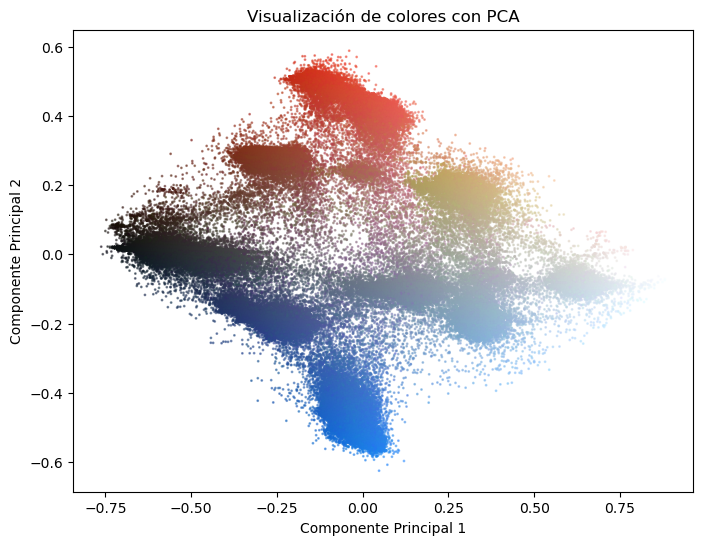

In [41]:
# Aplicar PCA para reducir de 3D (RGB) a 2D
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(datos_pixeles)

# Graficar los datos reducidos
plt.figure(figsize=(8, 6))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], s=1, c=datos_pixeles, alpha=0.5)
plt.title("Visualización de colores con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

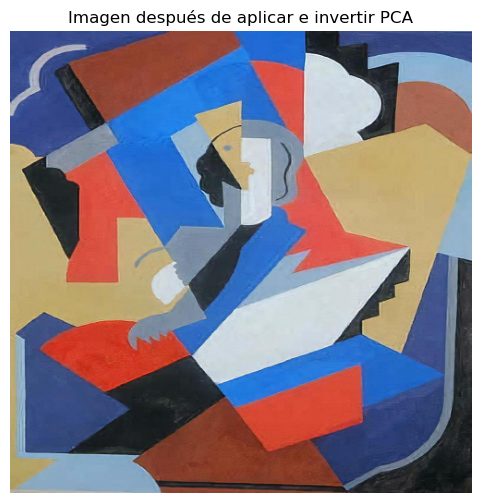

In [47]:
# Invertir PCA para recuperar los datos en el espacio original
x_recovered = pca.inverse_transform(x_reduced)

# Desnormalizar los valores (volver de [0,1] a [0,255])
x_recovered = (x_recovered * 255).astype(np.uint8)

num_imagenes = len(os.listdir(folder_path))
tamaño_img = (500, 500, 3)

# Separar los datos reconstruidos en imágenes individuales
imagenes_recuperadas = np.split(x_recovered, num_imagenes)  

# Mostrar la única imagen reconstruida
plt.figure(figsize=(6, 6))
plt.imshow(imagen_recuperada.reshape(tamaño_img))  # Asegurarse de que está en la forma correcta
plt.axis("off")
plt.title("Imagen después de aplicar e invertir PCA")
plt.show()
